<a href="https://colab.research.google.com/github/UnaRam/pythonFundamemtals/blob/main/Una_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [87]:
import pandas as pd
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
df = pd.read_csv(url)
display(df)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


177613.075 17876.4


,pageviews,year,month,month_num,day
date,,,,,
2016-05-19,19736,2016,May,5,19
2016-05-26,18060,2016,May,5,26
2016-05-27,19997,2016,May,5,27
2016-05-28,19044,2016,May,5,28
2016-05-29,20325,2016,May,5,29
...,...,...,...,...,...
2019-11-24,138875,2019,Nov,11,24
2019-11-29,171584,2019,Nov,11,29
2019-11-30,141161,2019,Nov,11,30


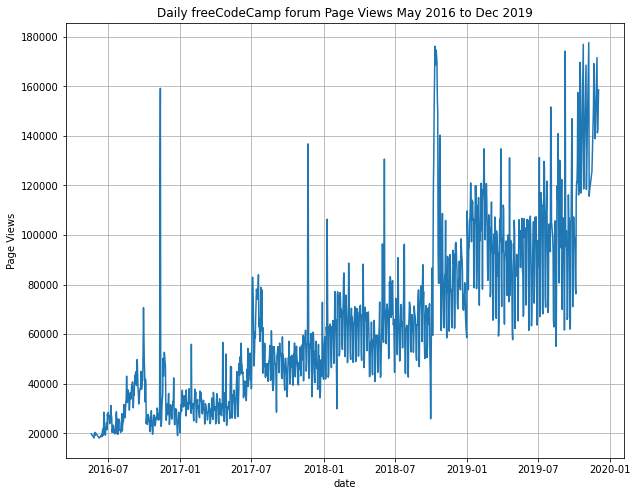

In [88]:
import matplotlib.pyplot as plt
import datetime as dt

# convert the date column to datetime type
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

#create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime("%b")
df['month_num']=df['date'].dt.month
df['day'] = df['date'].dt.day
df.rename(columns={'value':'pageviews'}, inplace=True)


#set the index to the date column.
indexed_df = df.set_index('date') #create new df so can run several times!
# display(indexed_df)

#filtering
filt_max = indexed_df['pageviews'].quantile(0.975)
filt_min = indexed_df['pageviews'].quantile(0.025)
print(filt_max, filt_min)
filter = ((filt_min <= indexed_df['pageviews']) & (indexed_df['pageviews']<=filt_max))
# display(filter)
filtered_df = indexed_df[filter]
display(filtered_df)
dates = filtered_df.index
pageviews = filtered_df['pageviews']
plt.plot(dates,pageviews)
plt.xlabel("date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp forum Page Views May 2016 to Dec 2019")
# plt.xticks(rotation=45)
plt.grid()
plt.show()

#repeat the filtering with for use in linreg
filtered_ordinal_df = df.copy()


###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


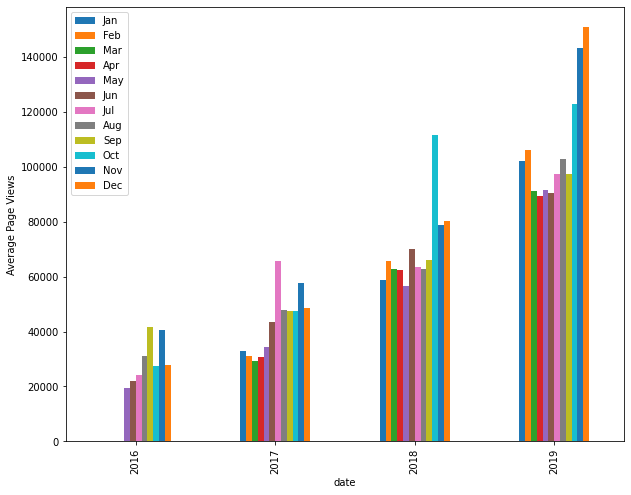

In [89]:
import numpy as np
# table = pd.pivot_table(filtered_df,values = 'value', index = ['year'], columns=['month'], aggfunc=np.average).sort_values(by = filtered_df.index.month)
table = filtered_df.pivot_table(index = filtered_df.index.year, columns=filtered_df.index.month, values = 'pageviews',aggfunc = np.average)
# df_pivot = final_df.pivot_table(index=final_df.index.year, columns=final_df.index.month, values='value', aggfunc='mean')
display(table)
piv_plot = table.plot(kind='bar')
piv_plot.legend(['Jan','Feb','Mar','Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) #could have derived this from unique list of months?
plt.rcParams["figure.figsize"] = (10, 8)
plt.ylabel("Average Page Views")
plt.show()


###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


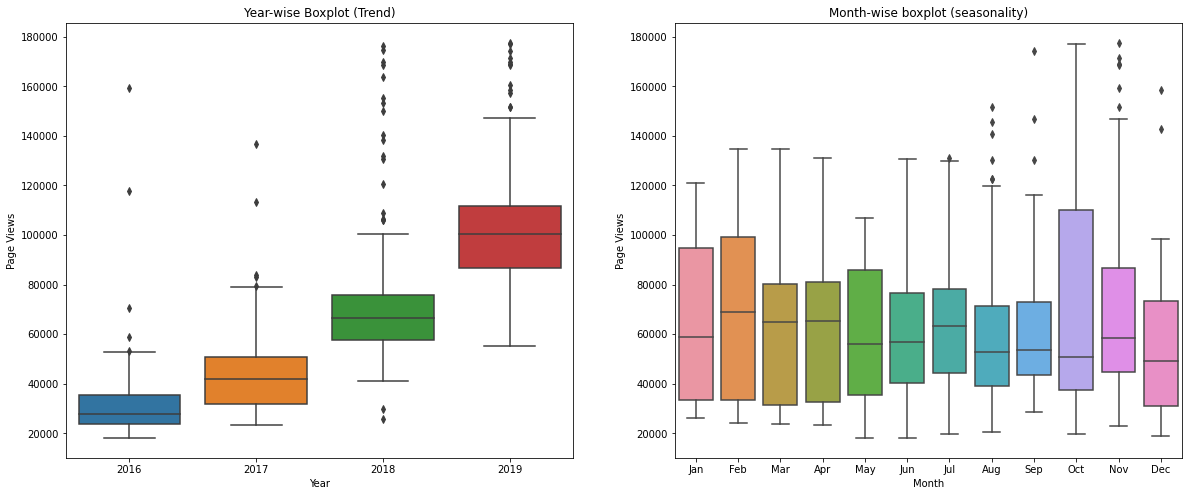

In [90]:
import seaborn as sns
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html - if it had not been already in this long format
#create seaborn boxplots by group
#A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
sorted_df = filtered_df.sort_values('month_num') #otherwise months start in May whcih was the first month
fig, ax =plt.subplots(1,2,figsize=(20,8))

myplot1 = sns.boxplot(x='year', y='pageviews', data=sorted_df,ax=ax[0]).set(xlabel='Year',ylabel='Page Views',title="Year-wise Boxplot (Trend)")
myplot2 = sns.boxplot(x='month', y='pageviews', data=sorted_df, ax=ax[1]).set(xlabel='Month',ylabel='Page Views', title= "Month-wise boxplot (seasonality)")
fig.show()

# https://seaborn.pydata.org/tutorial/axis_grids.html
# g = sns.FacetGrid(filtered_df, col="year", hue="month")
# g.map(sns.boxplot, "date", "values", alpha=.7)
# g.add_legend()


###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


In [92]:
from scipy.stats import linregress
def lin_regress(df,col1,col2):
  x = df[col1]
  y = df[col2]
  regression = linregress(x,y)
  print(regression)
  slope = regression.slope
  yint = regression.intercept
  rsquared = (regression.rvalue)**2
  pval = regression.pvalue
  print("slope: ",slope,"\nyint:",yint,"\nrsquared: ",rsquared,"\npval: ",pval)
  return slope, yint

year_slope, year_intercept = lin_regress(filtered_df,"year","pageviews")

LinregressResult(slope=24385.517311982254, intercept=-49137675.65559689, rvalue=0.7932714276471907, pvalue=1.3395933130147786e-268, stderr=532.3830168399695)
slope:  24385.517311982254 
yint: -49137675.65559689 
rsquared:  0.6292795579214121 
pval:  1.3395933130147786e-268


In [93]:
print(filtered_df.head())
print(filtered_df.tail())
print("shape\t",filtered_df.shape)
min_date = filtered_df.index.min()
print("Min = ",min_date)

            pageviews  year month  month_num  day
date                                             
2016-05-19      19736  2016   May          5   19
2016-05-26      18060  2016   May          5   26
2016-05-27      19997  2016   May          5   27
2016-05-28      19044  2016   May          5   28
2016-05-29      20325  2016   May          5   29
            pageviews  year month  month_num  day
date                                             
2019-11-24     138875  2019   Nov         11   24
2019-11-29     171584  2019   Nov         11   29
2019-11-30     141161  2019   Nov         11   30
2019-12-01     142918  2019   Dec         12    1
2019-12-03     158549  2019   Dec         12    3
shape	 (1238, 5)
Min =  2016-05-19 00:00:00


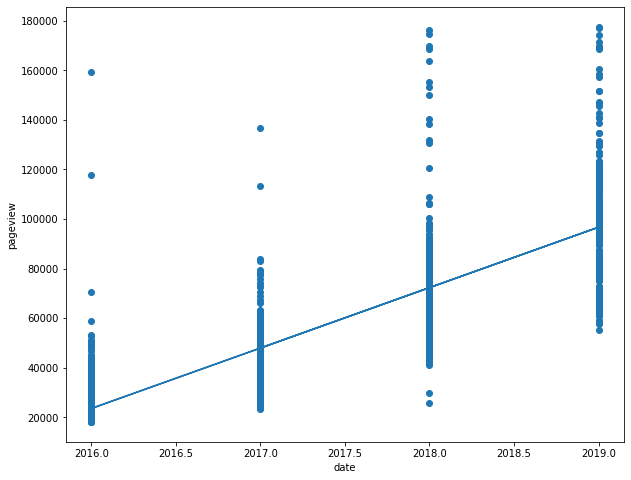

In [94]:
#plot
import matplotlib.pyplot as plt
y = sorted_df['pageviews']
x = sorted_df['year']

plt.ylabel("pageview")
plt.xlabel("date")

plt.scatter(x,y)

#best fit
plt.plot(x,year_slope*x + year_intercept)
plt.show()

In [95]:
# Repeat regression but use the index (date) which gives a granularity of one day
#  so slope is pageviews/day instead of pageviews/year as above
from scipy.stats import linregress
from datetime import datetime

def lin_regress2(df,col1,col2):
  # y[y.index.to_pydatetime() == datetime.datetime(2008,1,1)]  - to check against the date
  delta = (df.index - df.index[0]) #only works if it is an index
  # print(delta)
  x = delta.days #use days from start date
  # print(type(x),x)
  y = df[col2]
  print("x=\t",x)
  print("y=\t",y)
  
  regression = linregress(x,y)
  print(regression)
  slope = regression.slope
  yint = regression.intercept
  rsquared = (regression.rvalue)**2
  pval = regression.pvalue
  print("slope: ",round(slope,1),"\nyint:",round(yint,1),"\nrsquared: ",round(rsquared,3),"\npval: ",pval)
  return slope, yint

# print(sorted_df.head())
year_slope, year_intercept = lin_regress2(filtered_df,"year","pageviews")

x=	 Int64Index([   0,    7,    8,    9,   10,   19,   20,   21,   26,   27,
            ...
            1276, 1277, 1280, 1281, 1283, 1284, 1289, 1290, 1291, 1293],
           dtype='int64', name='date', length=1238)
y=	 date
2016-05-19     19736
2016-05-26     18060
2016-05-27     19997
2016-05-28     19044
2016-05-29     20325
               ...  
2019-11-24    138875
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-03    158549
Name: pageviews, Length: 1238, dtype: int64
LinregressResult(slope=73.1525855006713, intercept=16099.024215276651, rvalue=0.8317093717221613, pvalue=3.855767e-318, stderr=1.3890155237989457)
slope:  73.2 
yint: 16099.0 
rsquared:  0.692 
pval:  3.855767e-318


In [50]:
def predict_outcome(slope, intercept, year_to_predict):
  predicted = intercept + slope*year_to_predict
  return predicted

print("year\tpredicted pageviews")
for num in (2020,2025,2030):
  print(num, "\t",round(predict_outcome(year_slope, year_intercept, num)))



year	predicted pageviews
2020 	 121069
2025 	 242997
2030 	 364924


In [51]:
delta = (filtered_df.index - filtered_df.index[0])
days = delta.days
print(days)

Int64Index([   0,    7,    8,    9,   10,   19,   20,   21,   26,   27,
            ...
            1276, 1277, 1280, 1281, 1283, 1284, 1289, 1290, 1291, 1293],
           dtype='int64', name='date', length=1238)


first regresssion was based on data identified only by year.
perhaps improve by fitting a regression line to the data identified per day so will calculate pageviews per day


second attempt was to use the time difference in days between the first date in the datetimeindex of the df. this returned a decimal number to be used in the regression as it is not possible to use dates in the regression calculation

In [53]:
from datetime import datetime

# current date and time
now = datetime.now()

timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1647089014.929235


73.1525855006713 16099.024215276651


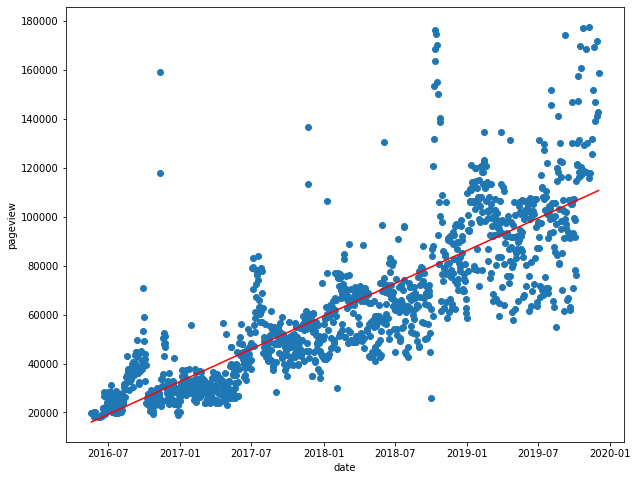

year	predicted pageviews
2020 	 139507
2025 	 273084
2030 	 406661


In [96]:
#plot
import matplotlib.pyplot as plt
import datetime

def plot_regression(df,slope, intercept):
  # wee_df = df.reset_index() - don't bother
  wee_df = df
  # print(wee_df.head())
  y = wee_df['pageviews']
  x = wee_df.index
  delta = wee_df.index - wee_df.index[0]
  x_days = delta.days #use days from start date - looks like this needs to be from a datetimeindex

  plt.ylabel("pageview")
  plt.xlabel("date")
  plt.scatter(x,y)

  #best fit
  print(slope, intercept)
  plt.plot(x,slope*x_days + intercept,color="red", label = "Best Fit")
  plt.show()
  # plt.plot(pd.to_datetime(x), line, color="green", label="Fitted line") - from Phoebe
  earliest_date = wee_df.index[0].date() 
  return earliest_date# returns the start date



def predict_outcome_2(slope, intercept, year_to_predict, start_date):
  predict_date = datetime.date(year_to_predict, 12, 31)
  delta_date = predict_date-start_date

  predicted = intercept + slope*delta_date.days #delta_date is datetime.timedelta and can just view the .days
  return predicted

min_date = plot_regression(filtered_df, year_slope, year_intercept)
print("year\tpredicted pageviews")
for num in (2020,2025,2030):
   print(num, "\t",round(predict_outcome_2(year_slope, year_intercept, num,min_date)))

#  [139764.02219623327, 291848.44975874573, 443932.87732125074] is correct

In [29]:
#  x = np.array(filtered_df.index.values.astype(int)) - Phoebe's 
x = np.array(filtered_df.index.values)
y = np.array(filtered_df['pageviews'])  
# print("x=\t",x)
# print("y=\t",y)

x=	 ['2016-05-19T00:00:00.000000000' '2016-05-26T00:00:00.000000000'
 '2016-05-27T00:00:00.000000000' ... '2019-11-30T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2019-12-03T00:00:00.000000000']
y=	 [ 19736  18060  19997 ... 141161 142918 158549]


decided that this must happen more often and there might be a better way to convert to a number - there is - to_ordinal
 https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
 
 https://www.geeksforgeeks.org/python-datetime-toordinal-method-with-example/


In [98]:
import datetime
# using date.today() to get todays date
dateToday = datetime.date.today()
 
# Using toordinal() to generate ordinal value.
toOrdinal = dateToday.toordinal()
 
# Prints Ordinal Value of Todays Date.
print(f"Ordinal of date {dateToday} is {toOrdinal}")

Ordinal of date 2022-03-12 is 738226


In [99]:
import datetime as dt
print(df.head())

data_df = df.copy()  #this is the unfiltered, unsorted df with the split columns, doesn't have the date as index
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['date']=data_df['date'].map(dt.datetime.toordinal)
print(data_df.head())

#must repeat the filtering
#filtering
ord_filt_max = data_df['pageviews'].quantile(0.975)
ord_filt_min = data_df['pageviews'].quantile(0.025)
print(ord_filt_max, ord_filt_min)
ord_filter = ((ord_filt_min <= data_df['pageviews']) & (data_df['pageviews']<=ord_filt_max))
# display(filter)
ord_filtered_df = data_df[ord_filter] #apply the filter
display(ord_filtered_df)


        date  pageviews  year month  month_num  day
0 2016-05-09       1201  2016   May          5    9
1 2016-05-10       2329  2016   May          5   10
2 2016-05-11       1716  2016   May          5   11
3 2016-05-12      10539  2016   May          5   12
4 2016-05-13       6933  2016   May          5   13
     date  pageviews  year month  month_num  day
0  736093       1201  2016   May          5    9
1  736094       2329  2016   May          5   10
2  736095       1716  2016   May          5   11
3  736096      10539  2016   May          5   12
4  736097       6933  2016   May          5   13
177613.075 17876.4


,date,pageviews,year,month,month_num,day
10,736103,19736,2016,May,5,19
17,736110,18060,2016,May,5,26
18,736111,19997,2016,May,5,27
19,736112,19044,2016,May,5,28
20,736113,20325,2016,May,5,29
...,...,...,...,...,...,...
1294,737387,138875,2019,Nov,11,24
1299,737392,171584,2019,Nov,11,29
1300,737393,141161,2019,Nov,11,30
1301,737394,142918,2019,Dec,12,1


In [57]:
# Repeat regression but use the date column which has been transformed into ordinal # days -  which gives a granularity of one day
#  so slope is pageviews/day instead of pageviews/year as above
from scipy.stats import linregress

def lin_regress3(df,col1,col2):
  x = df[col1]
  y = df[col2]
  print("x=\t",x)
  print("y=\t",y)
  
  regression = linregress(x,y)
  print(regression)
  slope = regression.slope
  yint = regression.intercept
  rsquared = (regression.rvalue)**2
  pval = regression.pvalue
  print("slope: ",round(slope,1),"\nyint:",round(yint,1),"\nrsquared: ",round(rsquared,3),"\npval: ",pval)
  return slope, yint

# print(sorted_df.head())
ord_year_slope, ord_year_intercept = lin_regress3(ord_filtered_df,"date","pageviews")

x=	 10      736103
17      736110
18      736111
19      736112
20      736113
         ...  
1294    737387
1299    737392
1300    737393
1301    737394
1303    737396
Name: date, Length: 1238, dtype: int64
y=	 10       19736
17       18060
18       19997
19       19044
20       20325
         ...  
1294    138875
1299    171584
1300    141161
1301    142918
1303    158549
Name: pageviews, Length: 1238, dtype: int64
LinregressResult(slope=73.15258550067131, intercept=-53831738.620585375, rvalue=0.8317093717221612, pvalue=3.855767e-318, stderr=1.3890155237989468)
slope:  73.2 
yint: -53831738.6 
rsquared:  0.692 
pval:  3.855767e-318


year	predicted pageviews
2020 	 139507
2025 	 273084
2030 	 406661
73.15258550067131 -53831738.620585375


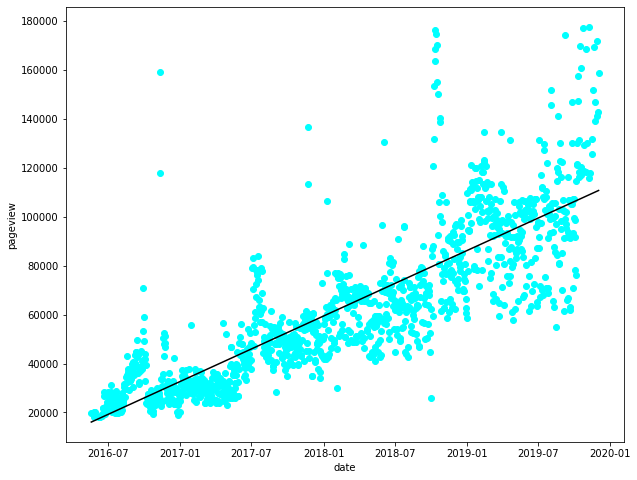

In [101]:

def plot_regression_ord(df,slope, intercept):
  # wee_df = df.reset_index() - don't bother
  wee_df = df.copy()
  y = wee_df['pageviews']
  x_ord = wee_df['date'] 
  x_date = x_ord.map(dt.datetime.fromordinal)  #to convert it back to date from ordinal - took ages to work this construction out - ask Karen
 
  # #plot scatter of original data
  plt.ylabel("pageview")
  plt.xlabel("date")
  plt.scatter(x_date,y, color="cyan")  #plt the date version of x

  #best fit
  print(slope, intercept)
  plt.plot(x_date,slope*x_ord + intercept,color="black")
  plt.show()
  # plt.plot(pd.to_datetime(x), line, color="green", label="Fitted line") - from Phoebe
 
  return 


def predict_outcome_ord(slope, intercept, year_to_predict):
  predict_date = datetime.date(year_to_predict, 12, 31)
  ord_date = predict_date.toordinal() #need to convert this to ordinal because the slope and intercept are in that format
  # print("ord date for prediction\n",ord_date)
  predicted = intercept + slope*ord_date #delta_date is datetime.timedelta and can just view the .days
  return predicted


print("year\tpredicted pageviews")
for num in (2020,2025,2030):
   print(num, "\t",round(predict_outcome_ord(ord_year_slope, ord_year_intercept, num)))

plot_regression_ord(ord_filtered_df, ord_year_slope, ord_year_intercept)

# Reflect

What caused the biggest problems?


datetime in a linear regression was extremely painful
tried a couple of methods - toordinal and also delta.days
How did you solve these problems?

lots of googling! thank you stackoverflow and kite. and discussions with Phoebe - we worked it out together
